### Data from https://www.kaggle.com/datasets/sahideseker/wine-quality-classification/data

In [ ]:
import pandas as pd
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as f

In [4]:
data = pd.read_csv("data.csv")

In [ ]:
high = data.loc[data['quality_label']=='high'].sample(frac=1)
medium = data.loc[data['quality_label']=='medium'].sample(frac=1)
low = data.loc[data['quality_label']=='low'].sample(frac=1)
high_count = len(high)
medium_count = len(medium)
low_count = len(low)

355

In [ ]:
traing_data = pd.concat([high[:math.floor(high_count*0.7)], medium[:math.floor(medium_count*0.7)], low[:math.floor(low_count*0.7)]]).sample(frac=1)
test_data = pd.concat([high[math.floor(high_count*0.7):], medium[math.floor(medium_count*0.7):], low[math.floor(low_count*0.7):]]).sample(frac=1)

,fixed_acidity,residual_sugar,alcohol,density,quality_label
872,6.3,5.5,9.7,0.9969,medium
629,10.6,5.3,10.4,0.9959,medium
536,9.8,3.4,12.6,1.0030,high
701,15.7,11.9,13.1,1.0024,medium
117,5.1,12.1,12.4,1.0004,medium
...,...,...,...,...,...
599,15.1,1.5,12.0,0.9989,low
92,7.5,7.2,10.3,0.9922,high
221,9.2,13.4,13.4,1.0020,high
955,4.1,9.3,8.9,0.9964,low


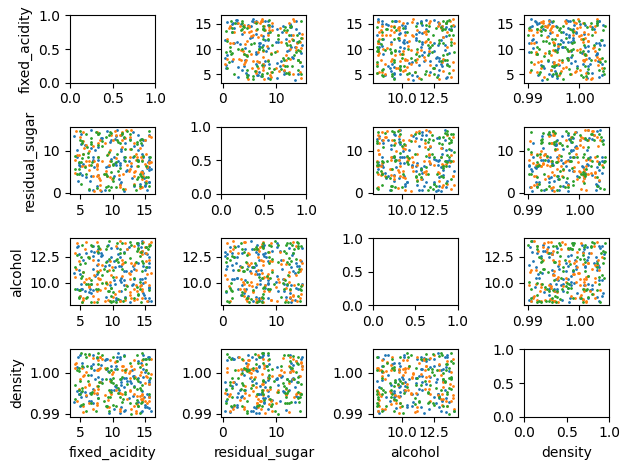

In [8]:
figure,axis = plt.subplots(4,4)
for idx1,col1 in enumerate(data.columns):
    if(col1=='quality_label'):
        continue
    plt.setp(axis[3,idx1],xlabel=data.columns[idx1])
    plt.setp(axis[idx1,0],ylabel=data.columns[idx1])
    for idx2,col2 in enumerate(data.columns):
        if(col2=='quality_label'):
            continue
        if(col2==col1):
            continue
        axis[idx1,idx2].scatter(high[col2],high[col1],s=1)
        axis[idx1,idx2].scatter(medium[col2],medium[col1],s=1)
        axis[idx1,idx2].scatter(low[col2],low[col1],s=1)
plt.tight_layout()

C:\Users\mokgg\AppData\Local\Temp\ipykernel_18376\2001492579.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axis[idx].boxplot(
C:\Users\mokgg\AppData\Local\Temp\ipykernel_18376\2001492579.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axis[idx].boxplot(
C:\Users\mokgg\AppData\Local\Temp\ipykernel_18376\2001492579.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axis[idx].boxplot(
C:\Users\mokgg\AppData\Local\Temp\ipykernel_18376\2001492579.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in

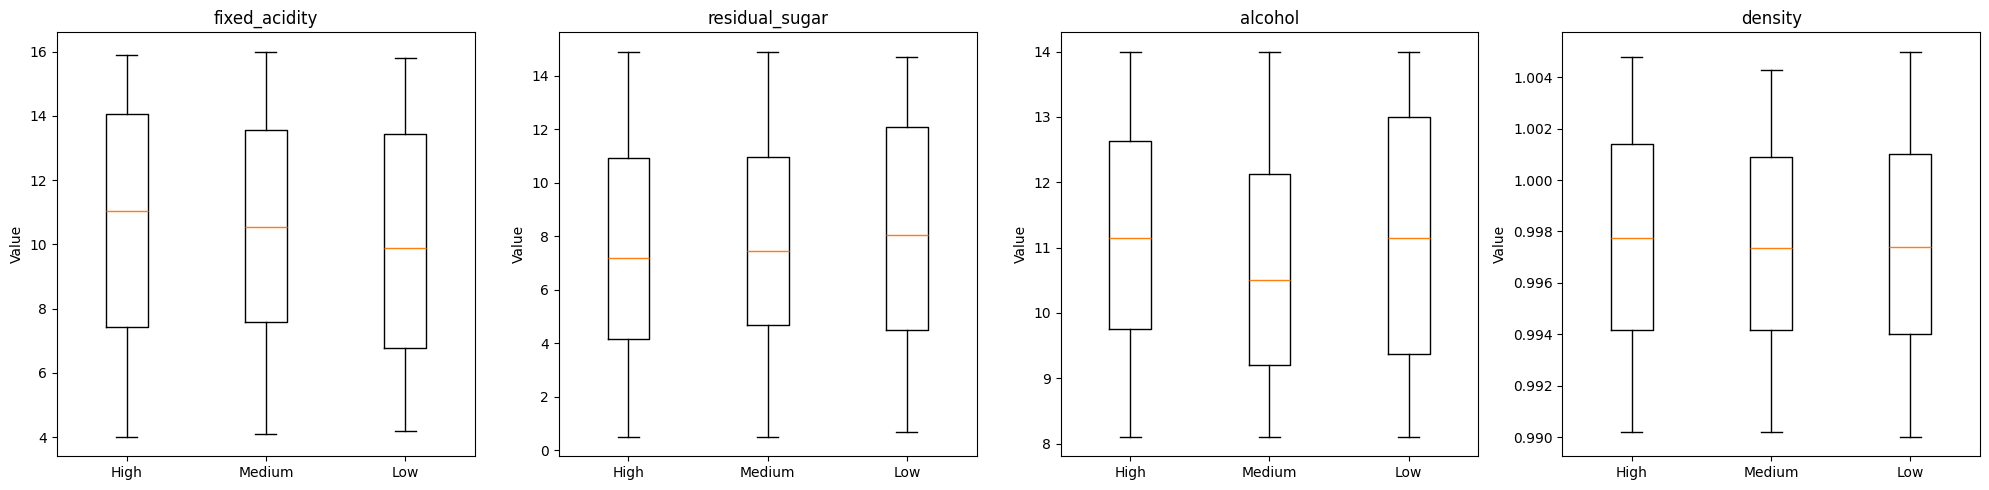

In [9]:
figure, axis = plt.subplots(1, len(data.columns) - 1, figsize=(20, 5))  # Adjust the figure size for better visualization

for idx, col in enumerate(data.columns):
    if col == 'quality_label':
        continue
    # Combine the boxplots for high, medium, and low in the same graph
    axis[idx].boxplot(
        [high[col], medium[col], low[col]],
        labels=['High', 'Medium', 'Low']
    )
    axis[idx].set_title(col)
    axis[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [24]:
# deep learning
learning_rate = 0.001
model = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 3)
)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [ ]:
# train
epochs = 1000
for epoch in range(epochs):
    